In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


/var/folders/2k/_5w54ms57s354pk985m8f6fr0000gn/T/ipykernel_18820/3611995243.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement=Base.classes.measurement
station= Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session= Session(engine)


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set. used chat gpt
most_recent_date = session.query(func.max(measurement.date)).scalar()
most_recent_date
# store string as a variable
recent_date_str= '2017-08-23'
# convert str into format that makes sense to sqlalchemy. code provided from chatgpt
most_recent_date_dt = datetime.strptime(most_recent_date, '%Y-%m-%d')
f'the most recent date in data set is {most_recent_date_dt}'

'the most recent date in data set is 2017-08-23 00:00:00'

In [11]:
one_year_date = most_recent_date_dt + timedelta(days=365)
f"Date one year from recent date:{one_year_date}"
# Perform a query to retrieve the data and precipitation scores


'Date one year from recent date:2018-08-23 00:00:00'

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
import pandas as pd
# Calculate the date one year from the last date in data set. Written using chatgpt
one_year_date = most_recent_date_dt - timedelta(days=365)
f"Date one year from recent date:{one_year_date}"
# Perform a query to retrieve the data and precipitation scores
precip_results = session.query(measurement.date, measurement.prcp) \
                     .filter(measurement.date >= one_year_date) \
                     .all()
# precip_results

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df= pd.DataFrame(precip_results)
precipitation_df=precipitation_df.set_index("date")
precipitation_df.head()
# Sort the dataframe by date
sorted_precipitation=precipitation_df.sort_values(by="date", ascending=True)
sorted_precipitation.head()


,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


Text(0.5, 1.0, 'Precipitation in Hawaii from 2016-08-23 to 2017-08-23')

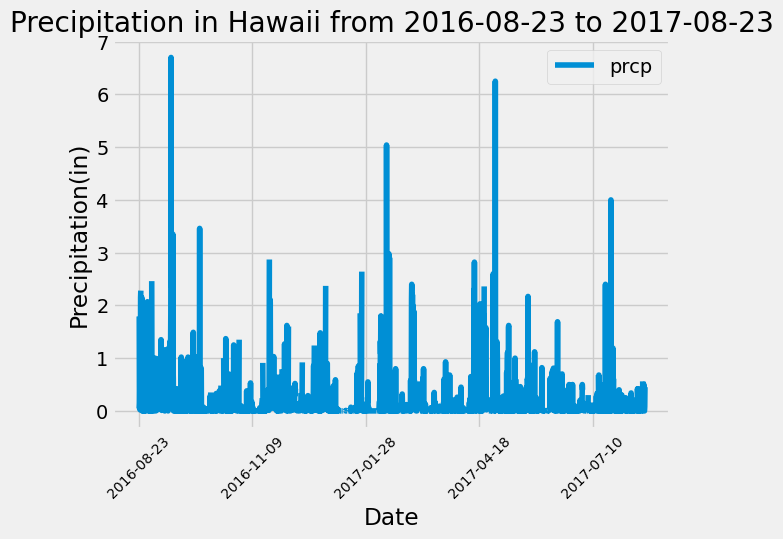

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
sorted_precipitation.plot()
plt.xticks(rotation=45,fontsize=10)
plt.xlabel("Date")
plt.ylabel("Precipitation(in)")
plt.title("Precipitation in Hawaii from 2016-08-23 to 2017-08-23")

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_precipitation.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
total_stations=session.query(func.count()).select_from(station).scalar()
total_stations
f"the total number of stations in Hawaii is {total_stations}"

'the total number of stations in Hawaii is 9'

In [23]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active=session.query(measurement.station,func.count(measurement.station)).\
    order_by(func.count(measurement.station).desc()).\
    group_by(measurement.station).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station='USC00519281'
active_station
lowest_temp=session.query(func.min(measurement.tobs)).filter(measurement.station == active_station).scalar()
highest_temp=session.query(func.max(measurement.tobs)).filter(measurement.station == active_station).scalar()
ave_temp=session.query(func.avg(measurement.tobs)).filter(measurement.station == active_station).scalar()

f"From the most active station, the lowest temp is {lowest_temp}F, the highest temp is {highest_temp}F, and the average temp is {ave_temp}F"

'From the most active station, the lowest temp is 54.0F, the highest temp is 85.0F, and the average temp is 71.66378066378067F'

Text(0.5, 1.0, 'Distribution of Temperatures in Waihee from 2016-08-18 to 2017-08-18')

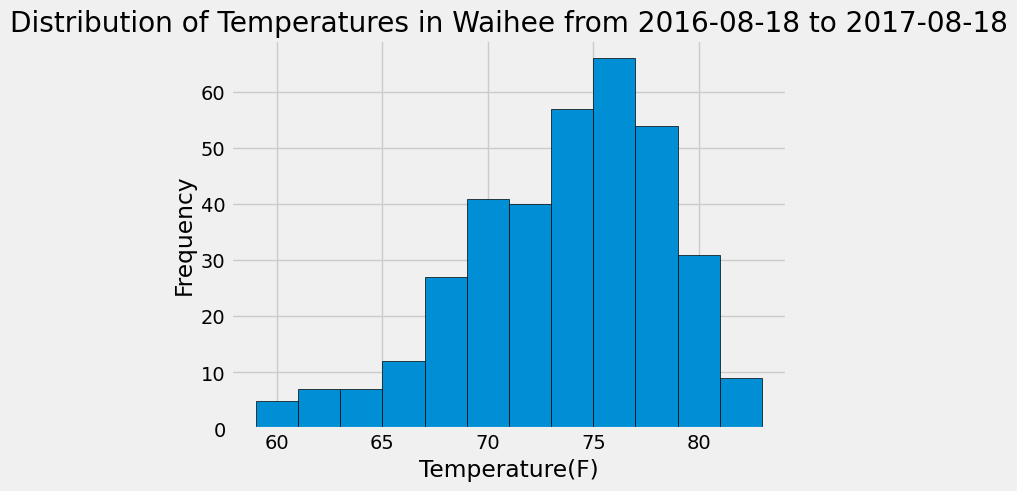

In [65]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_year= session.query(func.max(measurement.date)).filter(measurement.station == active_station).scalar()
last_year_date=datetime.strptime(last_year, '%Y-%m-%d')
last_year_date
first_year_date=last_year_date - timedelta(days=365)
first_year_date
temp_results = session.query(measurement.date,measurement.tobs) \
                     .filter(measurement.date >= first_year_date) \
                     .filter(measurement.date <= last_year_date)\
                     .filter(measurement.station == active_station)\
                    .all()
temp_results

temp_results_df=pd.DataFrame(temp_results)
temp_results_df.head()
temp_results_df.hist(bins=12,edgecolor='black')
plt.xlabel("Temperature(F)")
plt.ylabel("Frequency")
plt.title("Distribution of Temperatures in Waihee from 2016-08-18 to 2017-08-18")

# Close Session

In [16]:
# Close Session
session.close()